In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import seaborn as sns

In [5]:
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_colwidth', 400)

## Importing dataset

In [6]:
df_raw=pd.read_csv("survey_results_public.csv")

In [9]:
df_raw.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,...,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Bootstrapping a business;Professional development or self-paced learning from online courses,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;Colleague;Friend or family member;Hackathons (virtual or in-person);Online Courses or Certification;On the job training;Other online resources (e.g., videos, blogs, forum);School (i.e., University, College, etc)","Formal documentation provided by the owner of the tech;Blogs with tips and tricks;Books;Recorded coding sessions;How-to videos;Video-based Online Courses;Written-based Online Courses;Auditory material (e.g., podcasts);Online challenges (e.g., daily or weekly coding challenges);Written Tutorials;Click to write Choice 20;Stack Overflow",Other,18,9,"Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,...,Agree,Agree,Agree,Agree,Strongly agree,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testing;Observability tools,"Information Services, IT, Software Development, or other Technology",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced learning from online courses,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;Colleague;On the job training;Other online resources (e.g., videos, blogs, forum);School (i.e., University, College, etc)","Formal documentation provided by the owner of the tech;Blogs with tips and tricks;How-to videos;Online challenges (e.g., daily or weekly coding challenges);Written Tutorials;Click to write Choice 20;Stack Overflow",NaN,27,23,"Developer, back-end","5,000 to 9,999 employees",...,Agree,Agree,Agree,Agree,Agree,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testing;Observability tools;Innersource initiative;Developer portal or other central places to find tools/services;Continuous integration (CI) and (more often) continuous delivery,"Information Services, IT, Software Development, or other Technology",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Colleague;Friend or family member;Other online resources (e.g., videos, blogs, forum);School (i.e., University, College, etc)","Formal documentation provided by the owner of the tech;Blogs with tips and tricks;Auditory material (e.g., podcasts);Written Tutorials;Stack Overflow;Interactive tutorial",NaN,12,7,"Developer, front-end",100 to 499 employees,...,Strongly agree,Agree,Neither agree nor disagree,Agree,Agree,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) and (more often) continuous delivery,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, freelancer, or self-employed",Remote,Hobby;Contribute to open-source projects;Professional development or self-paced learning from online courses,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;Online Courses or Certification;Other

## Checking the Dataset
    *preliminary analysis of the data:
    checking columns, the null count, turning categorical data to numerical ones

In [10]:
df_raw.info()
df_raw.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 84 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ResponseId                           89184 non-null  int64  
 1   Q120                                 89184 non-null  object 
 2   MainBranch                           89184 non-null  object 
 3   Age                                  89184 non-null  object 
 4   Employment                           87898 non-null  object 
 5   RemoteWork                           73810 non-null  object 
 6   CodingActivities                     73764 non-null  object 
 7   EdLevel                              87973 non-null  object 
 8   LearnCode                            87663 non-null  object 
 9   LearnCodeOnline                      70084 non-null  object 
 10  LearnCodeCoursesCert                 37076 non-null  object 
 11  YearsCode                   

,ResponseId,CompTotal,WorkExp,ConvertedCompYearly
count,89184.000000,4.822500e+04,43579.000000,4.801900e+04
mean,44592.500000,1.036807e+42,11.405126,1.031101e+05
std,25745.347541,2.276847e+44,9.051989,6.814188e+05
min,1.000000,0.000000e+00,0.000000,1.000000e+00
25%,22296.750000,6.300000e+04,5.000000,4.390700e+04
50%,44592.500000,1.150000e+05,9.000000,7.496300e+04
75%,66888.250000,2.300000e+05,16.000000,1.216410e+05
max,89184.000000,5.000000e+46,50.000000,7.435143e+07


#### Removing Nulls from ConvertedCompYearly

In [13]:
df = df_raw.dropna(subset= ['ConvertedCompYearly'])

In [14]:
#Turning the data column Salary to integers
df.loc[:,"ConvertedCompYearly"].astype(int)                

1        285000
2        250000
3        156000
4         23456
5         96828
          ...  
89162     50719
89166     16917
89167     15752
89170     64254
89171     61041
Name: ConvertedCompYearly, Length: 48019, dtype: int32

In [15]:
df = df[(df.ConvertedCompYearly < 250000) & (df.ConvertedCompYearly > 1000)]

In [16]:
##dfa=pd.cut(df.ConvertedCompYearly,[0,5,95,100, right=True])

In [17]:
df[df.Q120 == "I agree"].count()

ResponseId             45359
Q120                   45359
MainBranch             45359
Age                    45359
Employment             45347
                       ...  
ProfessionalTech       30090
Industry               26262
SurveyLength           44900
SurveyEase             44937
ConvertedCompYearly    45359
Length: 84, dtype: int64

--We can remove column Q120
--We can turn RemoteWork [remote, in person, hybrid] input to numerical

In [18]:
df['AISearchHaveWorkedWith'].str.split(';')

3                                        NaN
4                                  [ChatGPT]
5        [ChatGPT, Google Bard AI, Neeva AI]
6                                  [ChatGPT]
7         [Bing AI, ChatGPT, Google Bard AI]
                        ...                 
89162                                    NaN
89166                              [ChatGPT]
89167                              [ChatGPT]
89170                              [ChatGPT]
89171                                    NaN
Name: AISearchHaveWorkedWith, Length: 45359, dtype: object

In [19]:
df['ConvertedCompYearly'].describe()

count     45359.000000
mean      83405.381975
std       53632.029804
min        1009.000000
25%       44000.000000
50%       74000.000000
75%      115000.000000
max      249518.000000
Name: ConvertedCompYearly, dtype: float64

array([[<Axes: title={'center': 'ConvertedCompYearly'}>]], dtype=object)

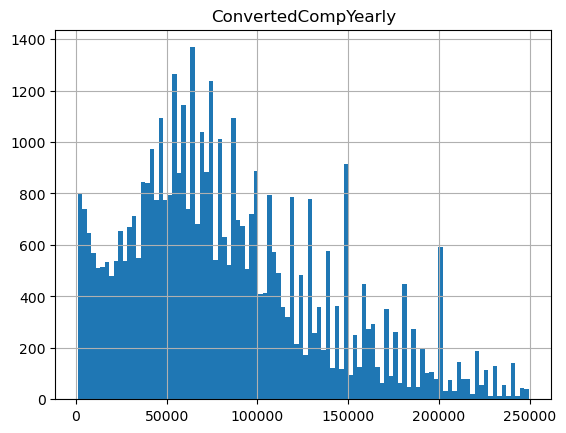

In [20]:
df.hist("ConvertedCompYearly", bins=100)

In [21]:
df[df.ConvertedCompYearly< 200000].ConvertedCompYearly.median()

70679.0

In [22]:
filt = df.Employment.value_counts().reset_index().head(7)['index'].tolist()

In [23]:
df.Employment.value_counts().reset_index()

,index,Employment
0,"Employed, full-time",37162
1,"Independent contractor, freelancer, or self-employed",3641
2,"Employed, full-time;Independent contractor, freelancer, or self-employed",3120
3,"Employed, part-time",871
4,"Independent contractor, freelancer, or self-employed;Employed, part-time",229
5,"Employed, full-time;Employed, part-time",144
6,"Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time",98
7,Retired,27
8,I prefer not to say,24
9,"Independent contractor, freelancer, or self-employed;Retired",16


In [24]:
df[df['Employment'].isin(filt)].groupby('Employment').agg({'ConvertedCompYearly' : ['mean', 'median']}).reset_index()

Employment  \
                                                                                                  
0                                                                           Employed, full-time   
1                                                       Employed, full-time;Employed, part-time   
2                      Employed, full-time;Independent contractor, freelancer, or self-employed   
3  Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time   
4                                                                           Employed, part-time   
5                                          Independent contractor, freelancer, or self-employed   
6                      Independent contractor, freelancer, or self-employed;Employed, part-time   

  ConvertedCompYearly           
                 mean   median  
0        84168.173968  74483.0  
1        54290.319444  45153.0  
2        82458.463782  74351.0  
3        66074.969388  50461.0  
4        52555.703789  48190.0  
5        86873.065641  78320.0  
6        62886.218341  56757.0

--The difference between med and mean

In [25]:
df['Country'].value_counts().reset_index().head(20)

,index,Country
0,United States of America,10257
1,Germany,3919
2,United Kingdom of Great Britain and Northern Ireland,3470
3,Canada,2041
4,India,1827
5,France,1785
6,Netherlands,1337
7,Poland,1254
8,Brazil,1223
9,Australia,1182


In [26]:
df.EdLevel.unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Some college/university study without earning a degree',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Primary/elementary school', 'Something else'], dtype=object)

<Figure size 2000x1000 with 0 Axes>

(array([21186.,  5357., 12408.,     0.,  2114.,  1535.,     0.,  2086.,
          197.,   476.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <BarContainer object of 10 artists>)

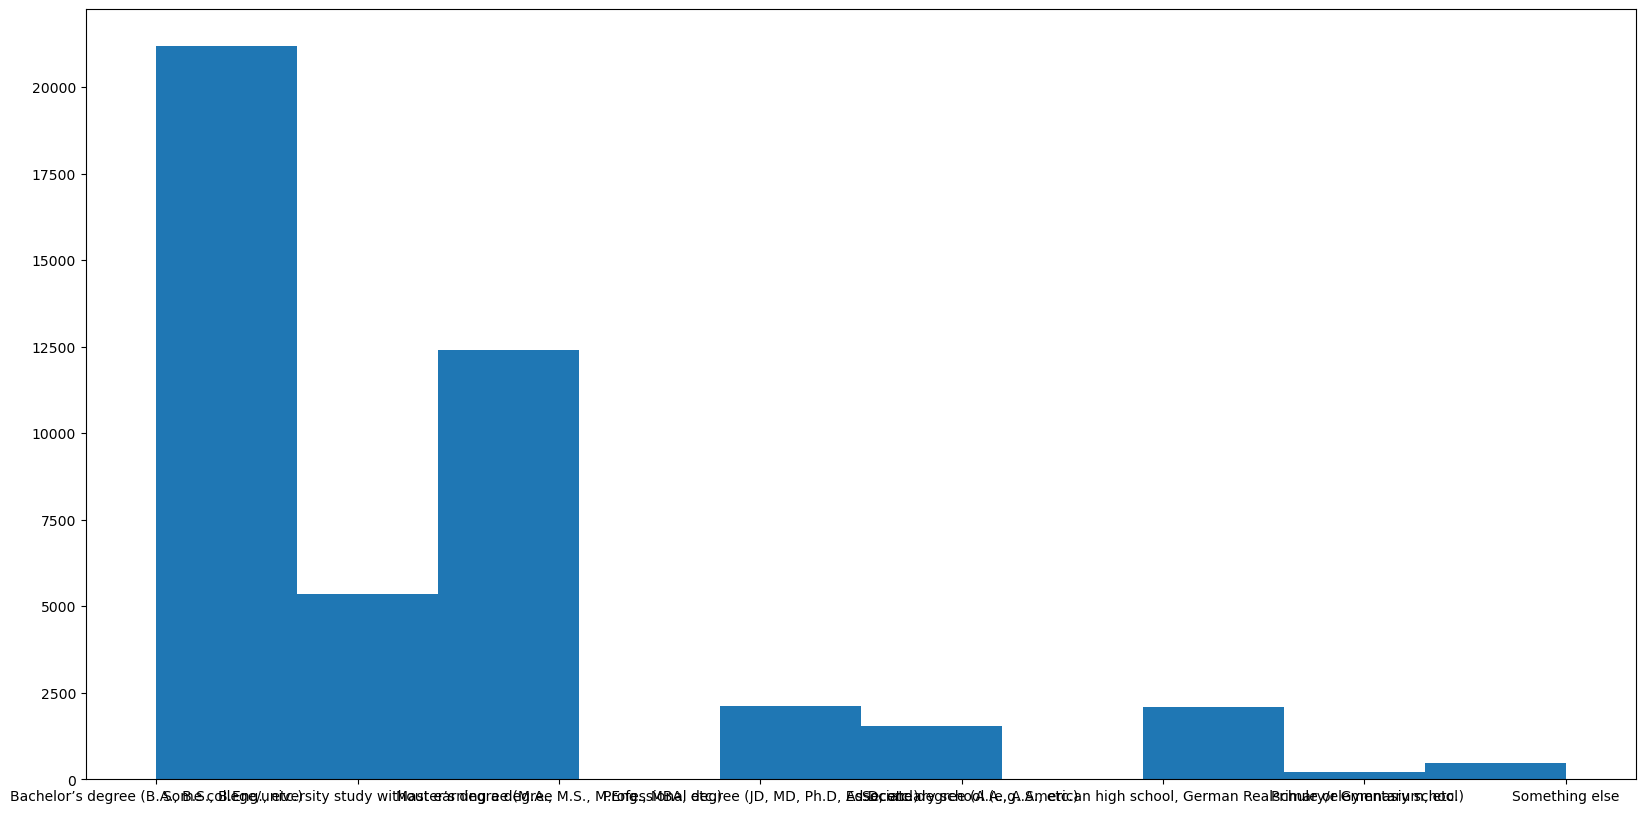

In [30]:
plt.figure(figsize=(20,10))
plt.hist(df.EdLevel)

array(['7', '4', '21', '3', '15', '9', 'Less than 1 year', '10', '2', '6',
       '14', '5', '19', '13', '16', '28', '30', '11', '8', '24', '40',
       '17', '29', '25', '23', '12', '20', '18', '50', '27', '43', '26',
       '1', '38', '33', '22', '35', 'nan', '31', '34', '32', '37', '42',
       'More than 50 years', '36', '39', '41', '44', '48', '45', '46',
       '47', '49'], dtype=object)

<Figure size 2000x1000 with 0 Axes>

<BarContainer object of 53 artists>

,YearsCodePro,ConvertedCompYearly
0,1,37594.0
1,10,78320.0
2,11,80317.0
3,12,83530.0
4,13,85672.0


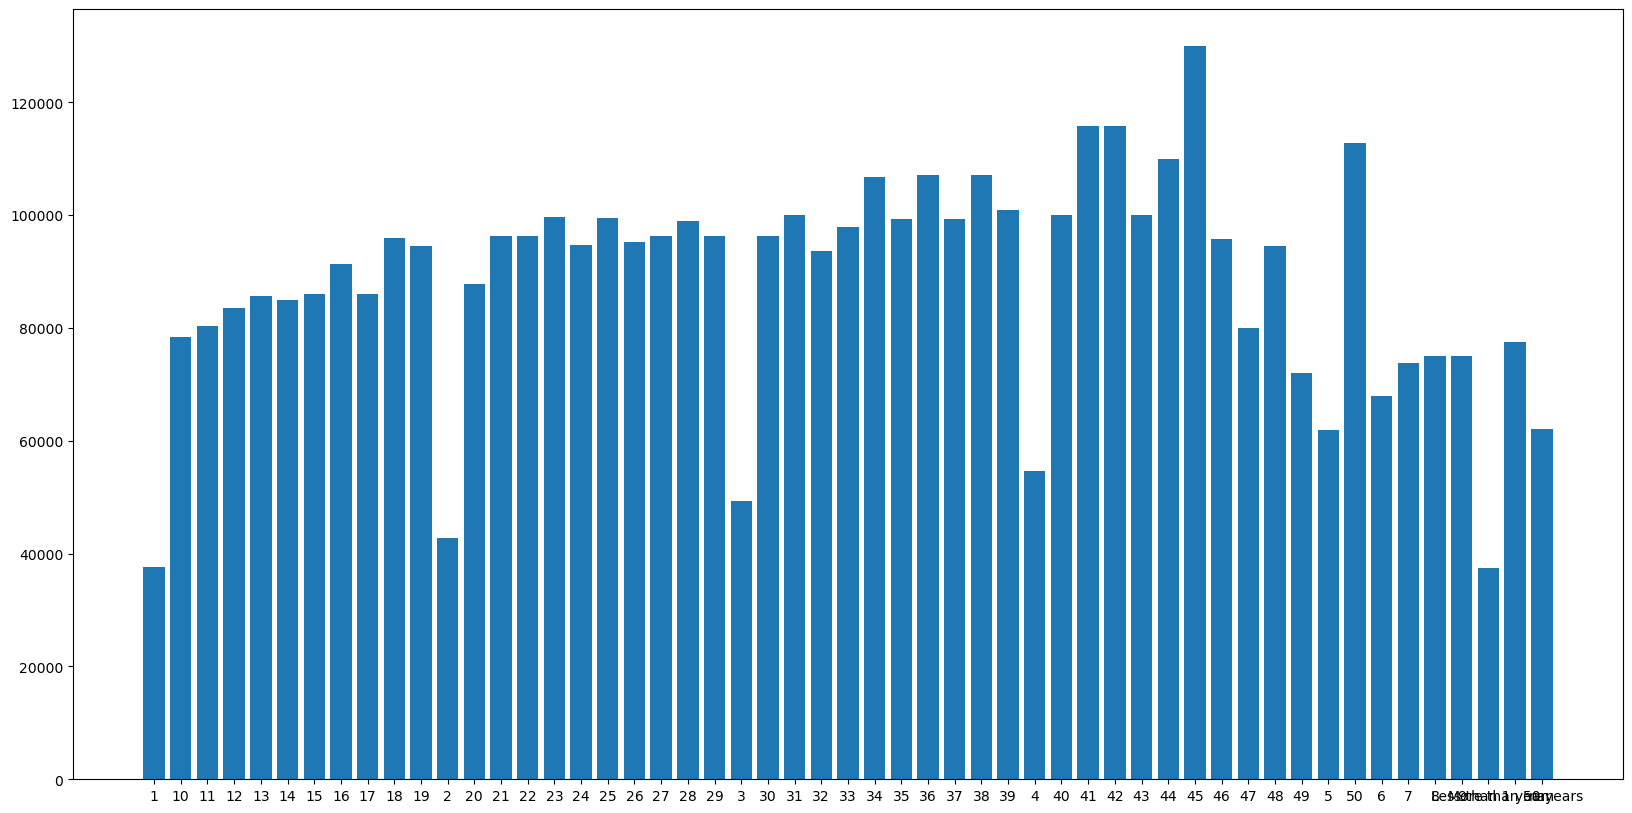

In [28]:
df['YearsCodePro'].fillna('nan', inplace=True)
df["YearsCodePro"].unique()
#plt.scatter(df.YearsCodePro, df.ConvertedCompYearly)
df_bar = df.loc[df["ConvertedCompYearly"] < 200000,['YearsCodePro','ConvertedCompYearly']].groupby('YearsCodePro').\
median().sort_values("YearsCodePro").reset_index()

plt.figure(figsize=(20,10))
plt.bar(df_bar.YearsCodePro, df_bar.ConvertedCompYearly)
df_bar.head()

In [29]:
df.DevType.unique()

array(['Developer, front-end', 'Developer, full-stack',
       'Developer, back-end', 'System administrator',
       'Developer, QA or test',
       'Data scientist or machine learning specialist',
       'Data or business analyst', 'Security professional',
       'Research & Development role', 'Developer, mobile',
       'Database administrator',
       'Developer, embedded applications or devices',
       'Developer, desktop or enterprise applications', 'Engineer, data',
       'Product manager', 'Academic researcher',
       'Cloud infrastructure engineer',
       'Senior Executive (C-Suite, VP, etc.)', 'Other (please specify):',
       'Developer Experience', 'Engineering manager', 'DevOps specialist',
       'Engineer, site reliability', 'Project manager', 'Blockchain', nan,
       'Developer, game or graphics', 'Developer Advocate',
       'Hardware Engineer', 'Educator', 'Scientist',
       'Marketing or sales professional', 'Designer', 'Student'],
      dtype=object)

In [31]:
df.EdLevel.unique ()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Some college/university study without earning a degree',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Primary/elementary school', 'Something else'], dtype=object)

In [28]:
df.ConvertedCompYearly.unique()

array([156000.,  23456.,  96828., ...,  34660.,   1606.,  16917.])

Change the str to numbers

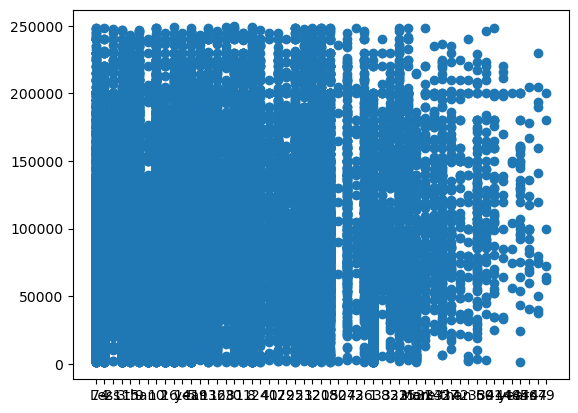

In [32]:
plt.scatter(df.YearsCodePro, df.ConvertedCompYearly)

Text(0.5, 1.0, 'Compensation vs Years of code')

Text(0.5, 0, 'YearsCodePro')

Text(0, 0.5, 'ConvertedCompYearly')

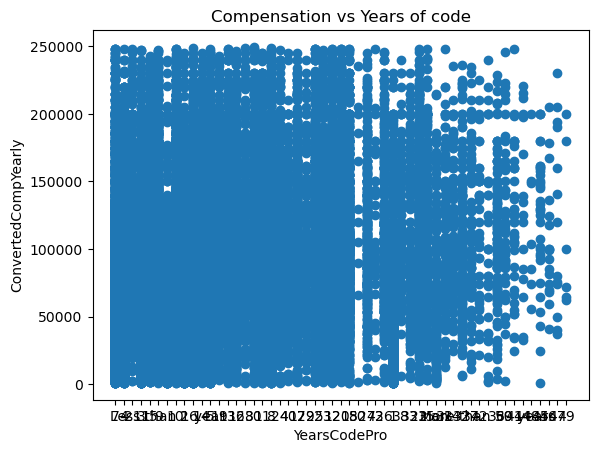

In [33]:
plt.scatter (df['YearsCodePro'], df['ConvertedCompYearly'])
plt.title ('Compensation vs Years of code')
plt.xlabel('YearsCodePro')
plt.ylabel ('ConvertedCompYearly')
plt.show()

### Ideas to go on
-plots and visualisation
-salaries with: countries(continent)/only Europe/ job title/experience
-survey from previous years

In [34]:
countries=pd.read_csv("Countries.csv", on_bad_lines='skip')
countries.head()

,Continent,Country
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin
3,Africa,Botswana
4,Africa,Burkina


In [35]:
euCountries = countries[countries.Continent == "Europe"]["Country"]
euCountries.tolist()

dfEU = df[df.Country.isin(euCountries)]  
dfEU.head()


['Albania',
 'Andorra',
 'Armenia',
 'Austria',
 'Azerbaijan',
 'Belarus',
 'Belgium',
 'Bosnia and Herzegovina',
 'Bulgaria',
 'Croatia',
 'Cyprus',
 'CZ',
 'Denmark',
 'Estonia',
 'Finland',
 'France',
 'Georgia',
 'Germany',
 'Greece',
 'Hungary',
 'Iceland',
 'Ireland',
 'Italy',
 'Latvia',
 'Liechtenstein',
 'Lithuania',
 'Luxembourg',
 'Macedonia',
 'Malta',
 'Moldova',
 'Monaco',
 'Montenegro',
 'Netherlands',
 'Norway',
 'Poland',
 'Portugal',
 'Romania',
 'San Marino',
 'Serbia',
 'Slovakia',
 'Slovenia',
 'Spain',
 'Sweden',
 'Switzerland',
 'Ukraine',
 'United Kingdom',
 'Vatican City']

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,...,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
8,9,I agree,"I am not primarily a developer, but I write code sometimes as part of my work/studies",45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Contribute to open-source projects,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Online Courses or Certification;On the job training;Other online resources (e.g., videos, blogs, forum)",Formal documentation provided by the owner of the tech;Blogs with tips and tricks;Books;How-to videos;Video-based Online Courses;Written-based Online Courses;Written Tutorials;Click to write Choice 20;Stack Overflow,Udemy;Pluralsight,20,15,System administrator,100 to 499 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,64254.0
14,15,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","On the job training;Other online resources (e.g., videos, blogs, forum)",Formal documentation provided by the owner of the tech;Blogs with tips and tricks;Written Tutorials,NaN,15,7,"Developer, full-stack","10,000 or more employees",...,Strongly agree,Strongly agree,Agree,Disagree,Agree,Never,6-10 times a week,1-2 times a week,15-30 minutes a day,Over 120 minutes a day,Microservices;Observability tools;Developer portal or other central places to find tools/services;Continuous integration (CI) and (more often) continuous delivery,Other,Appropriate in length,Easy,187407.0
15,16,I agree,I am a developer by profession,35-44 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Contribute to open-source projects;Professional development or self-paced learning from online courses,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Books / Physical media;Other online resources (e.g., videos, blogs, forum)",Formal documentation provided by the owner of the tech;Blogs with tips and tricks;Written Tutorials;Click to write Choice 20;Stack Overflow,NaN,15,10,"Developer, back-end",100 to 499 employees,...,Disagree,Neither agree nor disagree,Neither agree nor disagree,Agree,Neither agree nor disagree,1-2 times a week,1-2 times a week,1-2 times a week,15-30 minutes a day,15-30 minutes a day,Microservices;Automated testing;Observability tools;Continuous integration (CI) and (more often) continuous delivery,"Manufacturing, Transportation, or Supply Chain",Too long,Neither easy nor difficult,107090.0
16,17,I agree,I am a developer by profession,35-44 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Online Courses or Certification;Coding Bootcamp,NaN,NaN,4,2,"Developer, front-end","1,000 to 4,999 employees",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,45149.0
17,18,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Books / Physical media;Colleague;Other online resources (e.g., videos, blogs, forum);School (i.e., University, College, etc)","Formal documentation provided by the owner of the tech;Blogs with tips and tricks;Books;Recorded coding sessions;How-to videos;Video-based Online Courses;Written-based Online Courses;Auditory material (e.g., podcasts);Online challenges (e.g., daily or weekly coding challenges);Written Tutorials;Click to write Choice 20;Stack Overflow;Interactive tutorial;Programming Games",NaN,11,6,"Developer, front-end",500 to 999 employees,...,Agree,Agree,Disagree,Neither agree nor disagree,Disa

In [33]:
df.merge(countries, on="Country", how="right")

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,...,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly,Continent
0,3642.0,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Books / Physical media;Other online resources (e.g., videos, blogs, forum);School (i.e., University, College, etc)",Formal documentation provided by the owner of the tech;Blogs with tips and tricks;Books;How-to videos;Video-based Online Courses;Written Tutorials;Stack Overflow;Interactive tutorial,NaN,6,2,"Developer, full-stack",2 to 9 employees,...,Neither agree nor disagree,NaN,Strongly agree,Agree,1-2 times a week,1-2 times a week,NaN,60-120 minutes a day,Less than 15 minutes a day,None of these,NaN,Appropriate in length,Neither easy nor difficult,6586.0,Africa
1,5257.0,I agree,"I am not primarily a developer, but I write code sometimes as part of my work/studies",35-44 years old,"Employed, full-time",In-person,Contribute to open-source projects;Professional development or self-paced learning from online courses,Something else,"Online Courses or Certification;On the job training;Other online resources (e.g., videos, blogs, forum)",Formal documentation provided by the owner of the tech;Blogs with tips and tricks;Books;Recorded coding sessions;How-to videos;Video-based Online Courses;Written-based Online Courses;Written Tutorials;Click to write Choice 20;Stack Overflow;Interactive tutorial,Pluralsight,10,2,System administrator,"5,000 to 9,999 employees",...,Agree,Agree,Disagree,Agree,3-5 times a week,3-5 times a week,Never,30-60 minutes a day,30-60 minutes a day,NaN,NaN,Too short,Easy,7318.0,Africa
2,7087.0,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Books / Physical media;Other online resources (e.g., videos, blogs, forum);School (i.e., University, College, etc)",Blogs with tips and tricks;Books;How-to videos;Written Tutorials;Stack Overflow,NaN,8,3,"Developer, full-stack",10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,12000.0,Africa
3,8722.0,I agree,I am a developer by profession,18-24 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Contribute to open-source projects;Bootstrapping a business;Professional development or self-paced learning from online courses;Freelance/contract work;School or academic work;Other (please specify):,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",Other (please specify):,NaN,NaN,More than 50 years,More than 50 years,Other (please specify):,"10,000 or more employees",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,37776.0,Africa
4,22637.0,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Online Courses or Certification;On the job training;Other online resources (e.g., videos, blogs, forum)","Formal documentation provided by the owner of the tech;Blogs with tips and tricks;Books;How-to videos;Video-based Online Courses;Written-based Online Courses;Online challenges (e.g., daily or weekly coding challenges);Written Tutorials;Interactive tutorial",Codecademy;Udemy,10,5,"Developer, full-stack",20 to 99 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,26345.0,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30483,83738.0,I agree,"I am not primarily a developer, but I write code sometimes as part of my work/studies",25-34 years old,"Employed, full-time",Remote,Hobby;Professional deve

In [36]:
df_2 = df.loc[df["Country"].isin(["United States of America","Germany","United Kingdom of Great Britain and Northern Ireland"]),['EdLevel','DevType','Country','ConvertedCompYearly']]
df_2.head()

,EdLevel,DevType,Country,ConvertedCompYearly
3,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, front-end",United States of America,156000.0
5,Some college/university study without earning a degree,"Developer, back-end",United Kingdom of Great Britain and Northern Ireland,96828.0
6,Some college/university study without earning a degree,"Developer, full-stack",United States of America,135000.0
7,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, full-stack",United States of America,80000.0
12,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, full-stack",United States of America,75000.0


In [37]:
df_2.DevType.value_counts().reset_index().head(15)

,index,DevType
0,"Developer, full-stack",6661
1,"Developer, back-end",3025
2,"Developer, front-end",1020
3,"Developer, desktop or enterprise applications",986
4,Other (please specify):,613
5,"Developer, embedded applications or devices",566
6,Engineering manager,533
7,"Developer, mobile",451
8,"Engineer, data",379
9,DevOps specialist,357


In [39]:
df_3 = df_2.groupby(['Country','DevType','EdLevel']).agg({'ConvertedCompYearly' : ['mean', 'min', 'max', 'count']})\
.reset_index()
df_3.columns = ['Country','DevType','EdLevel','mean', 'min', 'max', 'count']
df_3 = df_3[df_3['count']>10]
df_3

,Country,DevType,EdLevel,mean,min,max,count
1,Germany,Academic researcher,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",57542.500000,3213.0,117798.0,90
2,Germany,Academic researcher,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",72845.488889,48190.0,149925.0,45
9,Germany,Cloud infrastructure engineer,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",82870.692308,49261.0,149925.0,13
10,Germany,Cloud infrastructure engineer,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",91529.777778,51403.0,171343.0,27
13,Germany,Cloud infrastructure engineer,"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",79781.818182,10709.0,123153.0,11
...,...,...,...,...,...,...,...
522,United States of America,"Senior Executive (C-Suite, VP, etc.)",Some college/university study without earning a degree,173194.444444,2500.0,245000.0,18
527,United States of America,System administrator,"Associate degree (A.A., A.S., etc.)",78458.333333,20000.0,150000.0,12
528,United States of America,System administrator,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",93274.780488,45000.0,200990.0,41
529,United States of America,System administrator,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",112241.818182,88000.0,150000.0,11


In [40]:
df_3G = df_3.loc[df_3["Country"]=="Germany",['DevType', 'EdLevel', 'mean']]
df_3U = df_3.loc[df_3["Country"]=="United States of America",['DevType', 'EdLevel', 'mean']]
df_3UK = df_3.loc[df_3['Country']=="United Kingdom of Great Britain and Northern Ireland", ['DevType', 'EdLevel', 'mean']]

In [41]:
def pivot_df(d):
    d= d.pivot('DevType','EdLevel','mean')
    return d

df_3G = pivot_df(df_3G)
df_3U = pivot_df(df_3U)
df_3UK = pivot_df(df_3UK)

C:\Users\Golam Kausar\AppData\Local\Temp\ipykernel_1908\827009259.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  d= d.pivot('DevType','EdLevel','mean')
C:\Users\Golam Kausar\AppData\Local\Temp\ipykernel_1908\827009259.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  d= d.pivot('DevType','EdLevel','mean')
C:\Users\Golam Kausar\AppData\Local\Temp\ipykernel_1908\827009259.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  d= d.pivot('DevType','EdLevel','mean')


<Axes: xlabel='EdLevel', ylabel='DevType'>

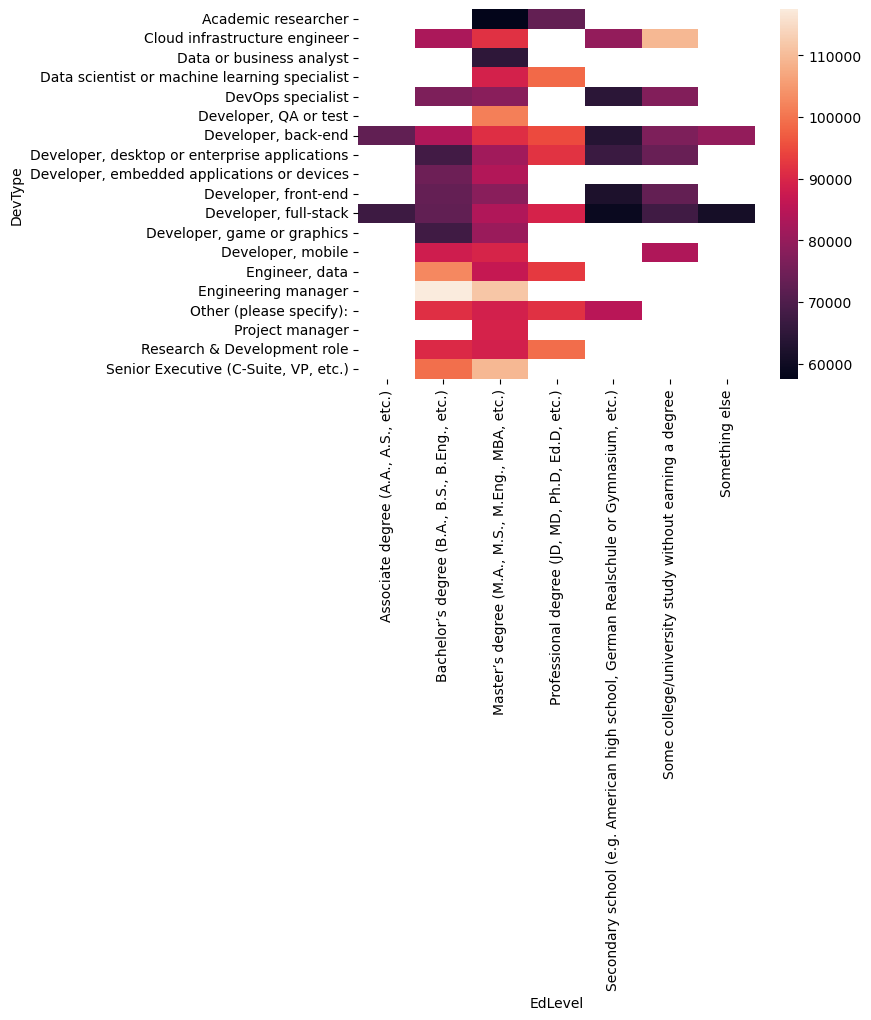

In [42]:
sns.heatmap(df_3G)

<Axes: xlabel='EdLevel', ylabel='DevType'>

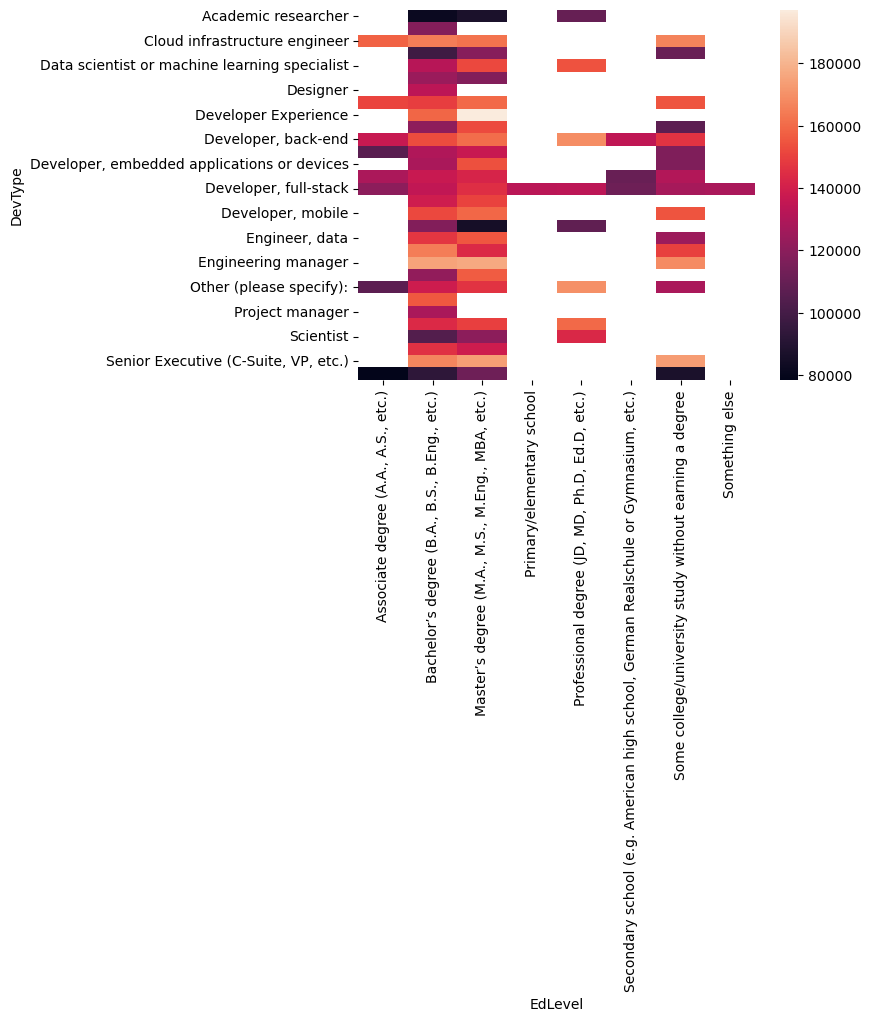

In [40]:
sns.heatmap(df_3U)

<Axes: xlabel='EdLevel', ylabel='DevType'>

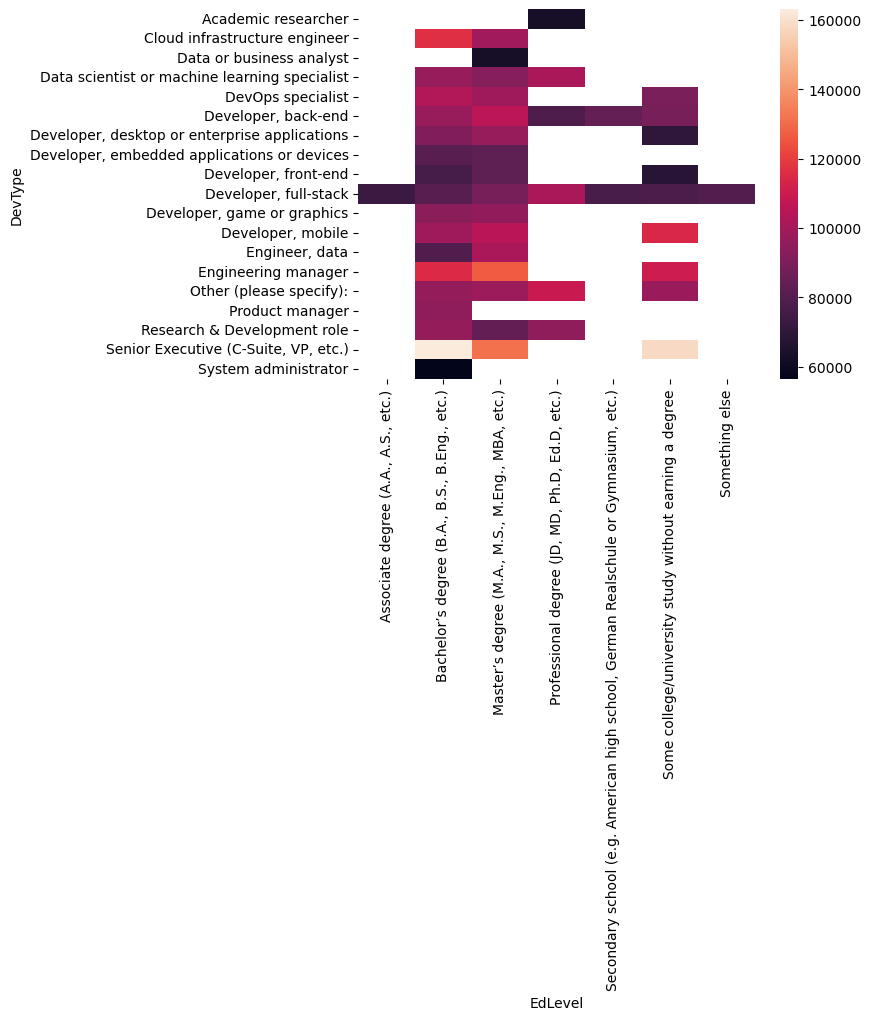

In [43]:
sns.heatmap(df_3UK)

In [42]:
#def c2c(country):
    #for i in country:
        

In [43]:
#df['Continent']= countries[countries.Country == df['Country']

In [44]:
#df.groupby('Country').agg({'ConvertedCompYearly' : ['mean', 'median']}).reset_index()

## Visualization
--Scatterplot

In [44]:
df.YearsCode.unique()

array(['12', '6', '21', '4', '5', '20', '10', '15', '11', '24', '8', '13',
       'Less than 1 year', '3', '16', '33', '22', '32', '35', '7', '18',
       '29', '19', 'More than 50 years', '38', '26', '34', '14', '9', '2',
       '23', '30', '40', '25', '45', '31', '43', '17', '27', '28', '39',
       '48', '42', '37', '36', '1', '41', '44', '46', nan, '49', '47',
       '50'], dtype=object)

In [45]:
# Replace 'Less than 1 year' and 'More than 50 years' with numerical values
df['YearsCode'].replace({'Less than 1 year': 0, 'More than 50 years': 51}, inplace=True)

# Convert the 'YearsCode' column to numeric, coercing errors to NaN
df['YearsCode'] = pd.to_numeric(df['YearsCode'], errors='coerce')

# Fill NaN values with the median value
median_years_code = df['YearsCode'].median()
df['YearsCode'] = df['YearsCode'].fillna(median_years_code).astype(int)

<Axes: xlabel='YearsCode', ylabel='ConvertedCompYearly'>

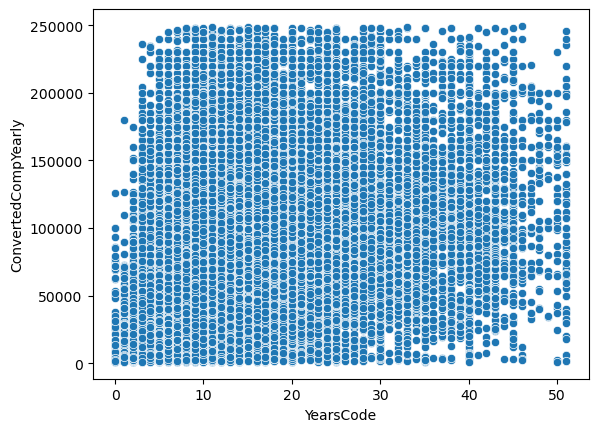

In [46]:
sns.scatterplot(data=df, x='YearsCode', y='ConvertedCompYearly')
plt.show()

## Boxplot

<Axes: xlabel='DevType', ylabel='ConvertedCompYearly'>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Developer, front-end'),
  Text(1, 0, 'Developer, full-stack'),
  Text(2, 0, 'Developer, back-end'),
  Text(3, 0, 'System administrator'),
  Text(4, 0, 'Developer, QA or test'),
  Text(5, 0, 'Data scientist or machine learning specialist'),
  Text(6, 0, 'Data or business analyst'),
  Text(7, 0, 'Security professional'),
  Text(8, 0, 'Research & Development role'),
  Text(9, 0, 'Developer, mobile'),
  Text(10, 0, 'Database administrator'),
  Text(11, 0, 'Developer, embedded applications or devices'),
  Text(12, 0, 'Developer, desktop or enterprise applications'),
  Text(13, 0, 'Engineer, data'),
  Text(14, 0, 'Product manager'),
  Text(15, 0, 'Academic researcher'),
  Text(16, 0, 'Cloud infrastructure engineer'),
  Text(17, 0, 'Senior Executive (C-Suite, VP, etc.)'),
  Text(18, 0, 'Other (please specify):'),
  Text(19, 0, 'Dev

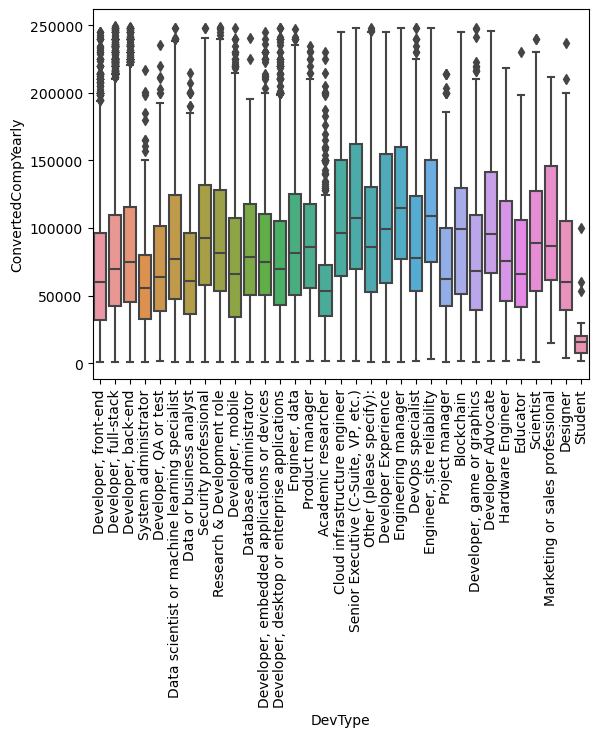

In [47]:
sns.boxplot(data=df, x='DevType', y='ConvertedCompYearly')
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='OrgSize', ylabel='ConvertedCompYearly'>

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '100 to 499 employees'),
  Text(1, 0, '20 to 99 employees'),
  Text(2, 0, '1,000 to 4,999 employees'),
  Text(3, 0, '10 to 19 employees'),
  Text(4, 0, '2 to 9 employees'),
  Text(5, 0, '10,000 or more employees'),
  Text(6, 0, '500 to 999 employees'),
  Text(7, 0, 'Just me - I am a freelancer, sole proprietor, etc.'),
  Text(8, 0, '5,000 to 9,999 employees'),
  Text(9, 0, 'I don’t know')])

<function matplotlib.pyplot.show(close=None, block=None)>

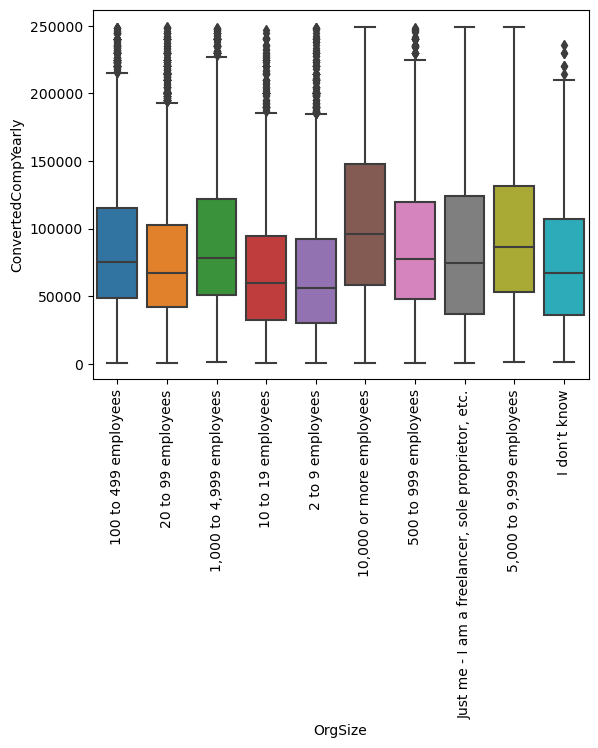

In [48]:
sns.boxplot (data=df, x= 'OrgSize', y= 'ConvertedCompYearly')
plt.xticks (rotation =90)
plt.show

C:\Users\Golam Kausar\AppData\Local\Temp\ipykernel_1908\1458225702.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df[['YearsCode', 'YearsCodePro', 'ConvertedCompYearly']].corr()


<Axes: >

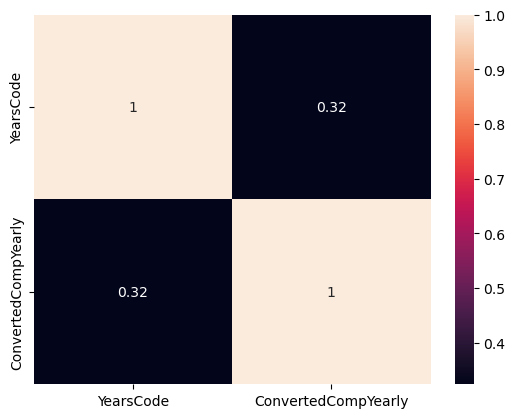

In [49]:
corr_matrix = df[['YearsCode', 'YearsCodePro', 'ConvertedCompYearly']].corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

## Barplot

<Axes: xlabel='EdLevel', ylabel='ConvertedCompYearly'>

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)'),
  Text(1, 0, 'Some college/university study without earning a degree'),
  Text(2, 0, 'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)'),
  Text(3, 0, 'Professional degree (JD, MD, Ph.D, Ed.D, etc.)'),
  Text(4, 0, 'Associate degree (A.A., A.S., etc.)'),
  Text(5, 0, 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)'),
  Text(6, 0, 'Primary/elementary school'),
  Text(7, 0, 'Something else')])

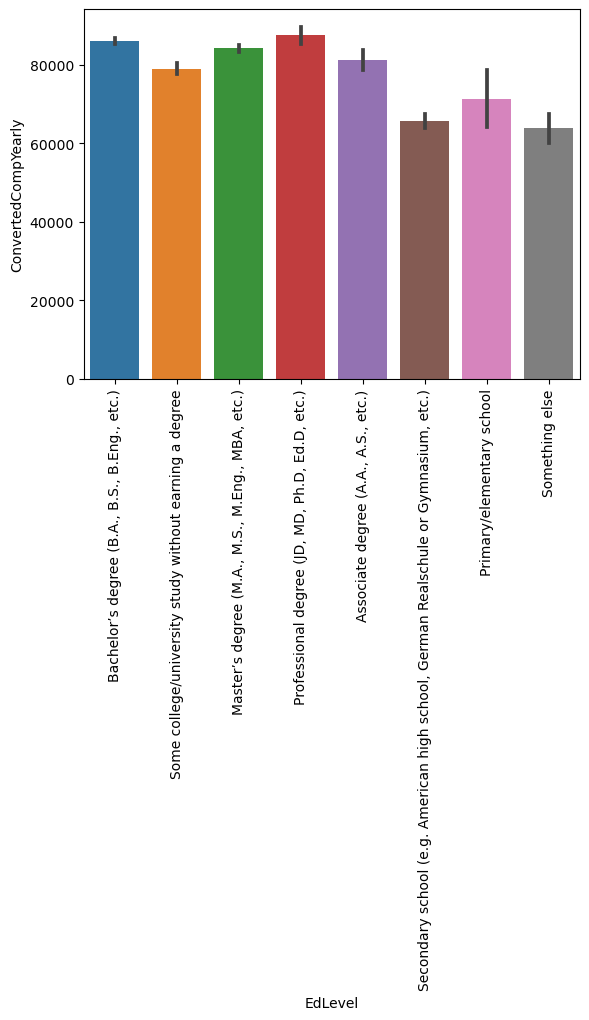

In [50]:
sns.barplot(data=df, x='EdLevel', y='ConvertedCompYearly')
plt.xticks(rotation=90)
plt.show()

In [ ]:
sns.barplot(data=df, x='Employment', y='ConvertedCompYearly')
plt.xticks(rotation=90)
plt.show()

In [ ]:
sns.barplot(data=df, x='LanguageHaveWorkedWith', y='ConvertedCompYearly')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.show()

In [54]:
df.WorkExp.unique()

In [ ]:
median_WorkExp = df['WorkExp'].median()
df['WorkExp'] = df['WorkExp'].fillna(median_WorkExp).astype(int)

In [ ]:
df.WorkExp.unique()

In [ ]:
sns.barplot(data=df, x='WorkExp', y='ConvertedCompYearly')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.RemoteWork.unique()

In [ ]:
sns.barplot(data=df, x='RemoteWork', y='ConvertedCompYearly')
plt.xticks(rotation=50)
plt.show()

## Violin plot

In [60]:
sns.violinplot(x='EdLevel', y='ConvertedCompYearly', data=df)
plt.xticks(rotation=90)  # Rotate x-axis labels for readability

In [ ]:
#Convert the 'YearsCodePro' and 'Industry' columns to strings
df['YearsCodePro'] = df['YearsCodePro'].astype(str)
df['Industry'] = df['Industry'].astype(str)

# Create a hexbin plot with 'ConvertedCompYearly' as color density
plt.hexbin(df['YearsCodePro'], df['Industry'], C=df['ConvertedCompYearly'], gridsize=30, cmap='Blues')

# Set axis labels and a title
plt.xlabel('YearsCodePro')
plt.ylabel('Industry')
plt.title('Hexbin Plot of ConvertedCompYearly, YearsCodePro, and Industry')

# Add a colorbar to show the density
cb = plt.colorbar()
cb.set_label('Density')

# Show the plot
plt.show()

## Data Cleaning before Machine learning

In [63]:
df = df_raw.dropna(subset= ['ConvertedCompYearly'])

In [64]:
#df.head()

In [65]:
df['YearsCodePro'].replace({'Less than 1 year': '0', 'More than 50 years': '51'}, inplace=True)
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')  # 'coerce' will handle 'nan'

C:\Users\Golam Kausar\AppData\Local\Temp\ipykernel_9004\943728951.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['YearsCodePro'].replace({'Less than 1 year': '0', 'More than 50 years': '51'}, inplace=True)
C:\Users\Golam Kausar\AppData\Local\Temp\ipykernel_9004\943728951.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')  # 'coerce' will handle 'nan'


In [66]:
# Replace 'nan' with -1
df['YearsCodePro'].fillna(-1, inplace=True)

C:\Users\Golam Kausar\AppData\Local\Temp\ipykernel_9004\904633729.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['YearsCodePro'].fillna(-1, inplace=True)


In [67]:
df.dropna(subset=['WorkExp'], inplace=True)

C:\Users\Golam Kausar\AppData\Local\Temp\ipykernel_9004\4001541622.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['WorkExp'], inplace=True)


In [68]:
columns_to_drop_na = ['EdLevel', 'RemoteWork', 'Employment', 'OrgSize', 'DevType', 'ConvertedCompYearly', 'YearsCodePro', 'WorkExp', 'Country']
df = df.dropna(subset=columns_to_drop_na)

In [70]:
#selected_countries = ["United States of America", "Germany", "United Kingdom of Great Britain and Northern Ireland"]
#df_6 = df[df['Country'].isin(selected_countries)][['Country', 'EdLevel', 'RemoteWork', 'Employment', 'OrgSize', 'DevType', 'ConvertedCompYearly', 'YearsCodePro', 'WorkExp']]
#df_6.head()

In [71]:
selected_country = [ "Germany"]
df_6 = df[df['Country'].isin(selected_country)][['Country', 'EdLevel', 'RemoteWork', 'Employment', 'OrgSize', 'DevType', 'ConvertedCompYearly', 'YearsCodePro', 'WorkExp']]
df_6.head()

,Country,EdLevel,RemoteWork,Employment,OrgSize,DevType,ConvertedCompYearly,YearsCodePro,WorkExp
15,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Hybrid (some remote, some in-person)","Employed, full-time",100 to 499 employees,"Developer, back-end",107090.0,10.0,15.0
19,Germany,Some college/university study without earning a degree,"Hybrid (some remote, some in-person)","Employed, full-time",20 to 99 employees,"Developer, full-stack",75010.0,14.0,14.0
21,Germany,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",Remote,"Employed, full-time",500 to 999 employees,Data scientist or machine learning specialist,85672.0,5.0,5.0
32,Germany,"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)","Hybrid (some remote, some in-person)","Employed, full-time",10 to 19 employees,"Developer, back-end",53545.0,7.0,7.0
37,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Remote,"Employed, full-time",500 to 999 employees,"Developer, full-stack",53982.0,2.0,3.0


In [72]:
categorical_cols = ['EdLevel', 'RemoteWork','Employment', 'OrgSize', 'DevType', 'Country']
numerical_cols= ['ConvertedCompYearly', 'YearsCodePro', 'WorkExp']

In [73]:
df_6[numerical_cols] = df_6[numerical_cols].astype(float)

In [74]:
df_ML= df_6[categorical_cols+numerical_cols].copy()

In [75]:
df_encoded = pd.get_dummies (df_ML, columns = categorical_cols, prefix ='', prefix_sep ='')

## Machine Learning

## Hypermeter tuning

In [76]:
X = df_encoded.drop('ConvertedCompYearly', axis=1)  
y = df_encoded['ConvertedCompYearly']

In [77]:
# Define hyperparameters and their values to search
param_grid = {
    'n_estimators': [10, 50, 60],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5, 10, 20],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [79]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [80]:
# Define the RandomForestRegressor model
model = RandomForestRegressor()

In [81]:
# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 5, 10, 20],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 5, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 60]},
             scoring='neg_mean_squared_error')

In [82]:
# Best hyperparameters found
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

In [84]:
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Estimator:", grid_search.best_estimator_)

Best Hyperparameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 60}
Best Estimator: RandomForestRegressor(bootstrap=False, max_features='sqrt', min_samples_leaf=5,
                      n_estimators=60)


In [49]:
# Use the best estimator for predictions
predictions = best_estimator.predict(X_test)

In [50]:
# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Best hyperparameters: {best_params}")

Mean Squared Error: 915665721.1785876
R-squared: 0.2451378296086536
Best hyperparameters: {'bootstrap': False, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 50}


## Try with afsoon's

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 101)

In [85]:
# Create the regressor
regressor = RandomForestRegressor()

# Define the hyperparameter grid
param_grid = {
    "n_estimators": [10, 50, 60],
    "max_depth": [None, 5, 10,20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5, 10, 20]
}

# Create the grid search object
grid_search = GridSearchCV(regressor, param_grid)

# Fit the grid search object to the data
grid_search.fit(X, y)

# Print the best parameters
print(grid_search.best_params_)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 5, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 60]})

{'max_depth': 20, 'min_samples_leaf': 20, 'min_samples_split': 5, 'n_estimators': 50}


In [86]:
# train the model using the best set of hyperparameters
randmf = RandomForestRegressor(max_depth=10, min_samples_leaf= 10, min_samples_split=2, n_estimators=100)
randmf.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=10)

In [87]:
y_pred_rf1 = pd.DataFrame( { "actual": y_test,
"predicted_prob": randmf.predict(
( X_test ) ) } )
y_pred_rf1

,actual,predicted_prob
15787,96381.0,84269.660250
22546,77104.0,73011.466939
74186,118869.0,95146.353931
19195,112444.0,83102.143014
11308,67466.0,66734.916421
...,...,...
2738,65325.0,80563.859335
84816,48190.0,58421.550699
38489,107090.0,88816.173644
20266,74963.0,69066.440222


In [89]:
import sklearn.metrics as metrics

In [90]:
mae = metrics.mean_absolute_error(y_pred_rf1['actual'], y_pred_rf1['predicted_prob'])
mse = metrics.mean_squared_error(y_pred_rf1['actual'], y_pred_rf1['predicted_prob'])
rmse = np.sqrt(mse) #mse**(0.5)
r2 = metrics.r2_score(y_pred_rf1['actual'], y_pred_rf1['predicted_prob'])
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

MAE: 21290.95687855997
MSE: 2572695907.922833
RMSE: 50721.749850757646
R-Squared: 0.10656882164516301


## Random forest

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [123]:
model = RandomForestRegressor(random_state=0)

In [124]:
# Train the model using the training data
model.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [125]:
# Make predictions on the test set
predictions = model.predict(X_test)

In [126]:
# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 19073628759.621834
R-squared: -1.0418157135205641
